In [320]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import inspect
import seaborn as sns 
import matplotlib.pyplot as plt
#from datetime import timedelta

def list_columns(df):
    for col in df: 
        print(col, end='   ')

def row_count(df):
    return len(df)

pg_1 = 'ggplot'
pg_2 = 'bmh'
pg_3 = 'Solarize_Light2'
pg_4 = 'classic'
pg = 'pg_4'

In [321]:
df1 = pd.read_csv('Shekar-Dataset-1/last_week.csv', index_col=0) 
df2 = pd.read_csv('Shekar-Dataset-1/station_info.csv', index_col=0)



#data = [lw, si]

#for df in data: # Change the coloumn names to something I feel more used to. 
#    df.rename(columns={"dteday": "date", "cnt": "total_rentals", 'casual': 'casual_rentals', 'registered': 'registered_rentals', 'mnth':'month'}, inplace=True)

In [322]:
df1.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,52943.000000,52512.000000,57934.000000,57934.000000,57848.000000,57848.000000
mean,31359.690233,31360.699612,38.903398,-77.031929,38.902358,-77.031565
std,252.234932,252.048691,0.027371,0.031668,0.027130,0.031517
min,31000.000000,31000.000000,38.782633,-77.368416,38.780000,-77.368447
25%,31212.000000,31213.000000,38.890496,-77.045128,38.890000,-77.045000
50%,31272.000000,31271.000000,38.902674,-77.032008,38.902386,-77.031887
75%,31603.000000,31603.000000,38.915417,-77.015970,38.912717,-77.015861
max,32609.000000,32901.000000,39.123513,-76.820000,39.123513,-76.820000


In [323]:
print(df1['start_station_name'].value_counts)

<bound method IndexOpsMixin.value_counts of ride_id
B3FA23181ADC06FE                       Georgia Ave & Spring St
6A153F2AD6700EE1    Merrifield Cinema & Merrifield Town Center
7265E4C759F1EDC0                      Columbia & Ontario Rd NW
18FB278BE5F2B0C7                                 1st & H St NW
294E78FE02E1C65F                                 5th & K St NW
                                       ...                    
A964858139D8693F                 17th St & Independence Ave SW
C027BB4E110C06B7                 17th St & Independence Ave SW
3EF5B216B64E7FDD                 17th St & Independence Ave SW
C37E11998FDC1078                 17th St & Independence Ave SW
56B80D92A24B8C93                 17th St & Independence Ave SW
Name: start_station_name, Length: 57934, dtype: object>


In [324]:
# https://www.semicolonworld.com/question/54955/mapping-columns-from-one-dataframe-to-another-to-create-a-new-column
df1['capacity_start_station'] = df1.start_station_name.map(dict(df2[['Name', 'Capacity']].values))
df1['capacity_end_station'] = df1.end_station_name.map(dict(df2[['Name', 'Capacity']].values))

df1['started_at'] = pd.to_datetime(df1['started_at'], format='%Y-%m-%d %H:%M:%S')# <-- How to change the datetime format to '%d.%m.%Y'| Use in a new line of code: dt.strftime('%m/%d/%Y')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d %H:%M:%S')
df1['day'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d')

df1['rental_duration'] = df1['ended_at']-df1['started_at']
df1['rental_duration_num'] = df1['ended_at']-df1['started_at']
df1['rental_duration_num_min'] = df1['rental_duration_num'].dt.seconds//60

df1['routes'] = df1['start_station_id'].astype(str) + df1['end_station_id'].astype(str)
df1['combined_capacity'] = df1['capacity_start_station']*df1['capacity_end_station']




In [325]:
total = df1.isnull().sum().sort_values(ascending=False)
percent_1 = df1.isnull().sum()/df1.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
combined_capacity,7565,13.1
capacity_end_station,5555,9.6
end_station_name,5422,9.4
end_station_id,5422,9.4
capacity_start_station,5150,8.9


In [326]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57934 entries, B3FA23181ADC06FE to 56B80D92A24B8C93
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   rideable_type            57934 non-null  object         
 1   started_at               57934 non-null  datetime64[ns] 
 2   ended_at                 57934 non-null  datetime64[ns] 
 3   start_station_name       52943 non-null  object         
 4   start_station_id         52943 non-null  float64        
 5   end_station_name         52512 non-null  object         
 6   end_station_id           52512 non-null  float64        
 7   start_lat                57934 non-null  float64        
 8   start_lng                57934 non-null  float64        
 9   end_lat                  57848 non-null  float64        
 10  end_lng                  57848 non-null  float64        
 11  member_casual            57934 non-null  object         
 1

In [327]:
df1_raw = df1
df1 = df1.dropna()


In [328]:
print('Attention!',((row_count(df1_raw)-row_count(df1))/row_count(df1_raw))*100,'% of the inital data has been droped due to missing values!')

Attention! 13.057962509062035 % of the inital data has been droped due to missing values!


In [329]:
list_columns(df1)

rideable_type   started_at   ended_at   start_station_name   start_station_id   end_station_name   end_station_id   start_lat   start_lng   end_lat   end_lng   member_casual   day   capacity_start_station   capacity_end_station   rental_duration   rental_duration_num   rental_duration_num_min   routes   combined_capacity   

In [330]:
list_columns(df2)

Name   Capacity   

In [331]:
df = df1 # Chage to use raw data.

### Targeting Road Map

Station | Depature Counts | Arrival Counts

1. Get departure & arrival counts. (Trips per station)
2. Percentage of trips / member type.
3. Percentage of trips / bike type.
4. Number of trips / station pair (route)
6. Plot trips / station / day
7. Plot trips / station / member
8. Plot trips / member / day
9. Create a flow map for all stations to get a better understanding of the bike circulation. 

1 & 5 maybe combined

### 1. Departure & Arrival Counts

In [332]:
# Value counts departures
dfd = df['start_station_name'].value_counts().reset_index() #df.groupby(['start_station_name']).count()['start_station_id'].reset_index()
dfd.columns  = ['station', 'count_departure']

In [333]:
# Value counts arrivals
dfa = df['end_station_name'].value_counts().reset_index() #df.groupby(['end_station_name']).count()['start_station_id'].reset_index()
dfa.columns  = ['station', 'count_arrival']

In [351]:
df

,count_arrival,count_departure,station
0,NaN,NaN,Jefferson Dr & 14th St SWLincoln Memorial
1,NaN,NaN,Lincoln MemorialJefferson Dr & 14th St SW
2,NaN,NaN,4th St & Madison Dr NW4th St & Madison Dr NW
3,NaN,NaN,Henry Bacon Dr & Lincoln Memorial Circle NWHen...
4,NaN,NaN,15th & P St NW15th & P St NW
...,...,...,...
599,NaN,NaN,NaN
600,NaN,NaN,NaN
601,NaN,NaN,NaN
602,NaN,NaN,NaN


In [334]:
station_arrival_departure = pd.merge(dfa, dfd, how='outer').sort_values(by=['count_arrival', 'count_departure'], ascending=False).head(10)

In [348]:
station_arrival_departure.head(20)

,station,variable,value
0,Jefferson Dr & 14th St SW,count_arrival,718.0
1,Lincoln Memorial,count_arrival,673.0
2,4th St & Madison Dr NW,count_arrival,620.0
3,Henry Bacon Dr & Lincoln Memorial Circle NW,count_arrival,585.0
4,15th & P St NW,count_arrival,581.0
5,New Hampshire Ave & T St NW,count_arrival,554.0
6,Smithsonian-National Mall / Jefferson Dr & 12t...,count_arrival,527.0
7,Columbus Circle / Union Station,count_arrival,471.0
8,3rd & M St NE,count_arrival,471.0
9,Massachusetts Ave & Dupont Circle NW,count_arrival,444.0


### 1.1 Analyze departures & arrivals

In [336]:
station_arrival_departure = pd.melt(data, id_vars=['station'], value_vars=['count_arrival', 'count_departure'])

<AxesSubplot:xlabel='value', ylabel='station'>

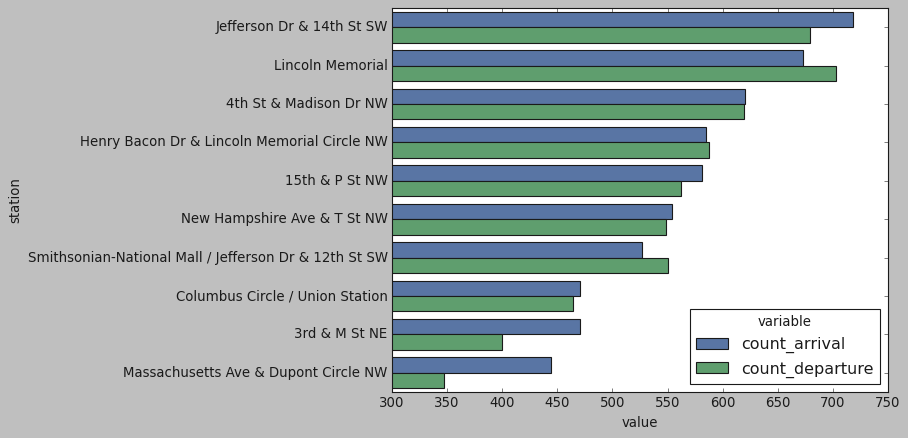

In [347]:
sns.set(rc={'figure.figsize':(16,10)}, )
plt.style.use(pg_4)
plt.xlim(300, 750)
sns.barplot(y='station', x='value', hue='variable', data=station_arrival_departure)

1.2 Important departure & arrival counts